In [1]:
%run Data_Science_Preprocessing.ipynb

2020-10-30 15:18:43 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-10-30 15:18:43 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-10-30 15:18:43 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-10-30 15:25:27 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


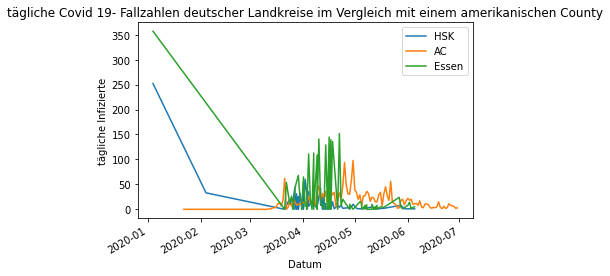

In [22]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

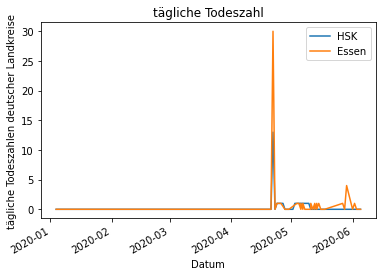

In [23]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

Text(0.5, 1.0, 'Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

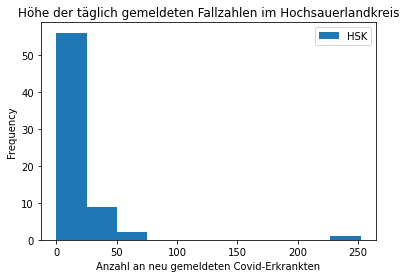

In [24]:
ax = plt.gca()

d['Hochsauerlandkreis'].plot(kind='hist', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
ax.set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten')
ax.set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

Zeigt an dass die meisten täglichen Meldungen Meldungen mit zwischen 0 und 25 neue Infizierten hatten
Hat nicht so geklappt wie es sollte (Sollte zsmhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen)

2020-10-30 15:25:30 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-10-30 15:25:30 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-10-30 15:25:30 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-10-30 15:25:30 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


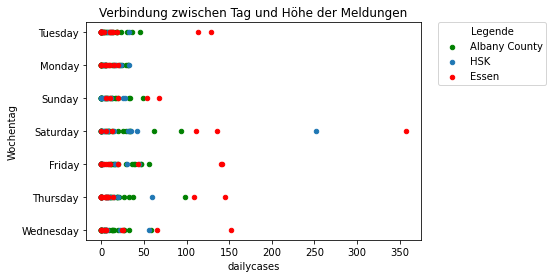

In [25]:
ax = plt.gca()
dic['Albany County'].plot(kind='scatter', x = 'dailycases', y= 'Weekday', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
_=ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [26]:
import geopandas as gpd
bundesland_capital = pd.read_csv('bundcap.csv')
bundesland_capital = gpd.GeoDataFrame(bundesland_capital, geometry=gpd.points_from_xy(bundesland_capital.Longitude, bundesland_capital.Latitude))
bundesland_capitalname = bundesland_capital 

2020-10-30 15:20:09 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x00000246E516DA88>
2020-10-30 15:20:09 [fiona.env] DEBUG: Starting outermost env
2020-10-30 15:20:09 [fiona.env] DEBUG: No GDAL environment exists
2020-10-30 15:20:09 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x00000246DD2D0A88> created
2020-10-30 15:20:09 [fiona._env] DEBUG: Logging error handler pushed.
2020-10-30 15:20:09 [fiona._env] DEBUG: All drivers registered.
2020-10-30 15:20:09 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-10-30 15:20:09 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-10-30 15:20:09 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x00000246DD2D0A88>.
2020-10-30 15:20:09 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x00000246DD2D0A88> with options

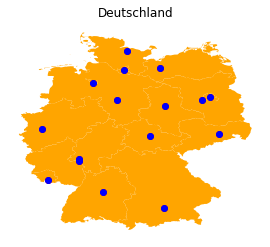

In [8]:
germap = gpd.read_file('geomap/vg2500_bld.shp')
ax = germap.plot(color='orange')

ax = bundesland_capital.plot(ax=ax, color='red')
ax = bundesland_capitalname.plot(ax=ax, color='blue') #Damit sollen eigentlich die Städtenamen angezeigt werden und keine blauen Punke


plt.rcParams['figure.figsize'] = [21, 9]
ax.set_title('Deutschland')
ax.set_axis_off()

plt.show()

Wurde nur für Tests genutzt, wird wahrscheinlich am Ende wieder gelöscht

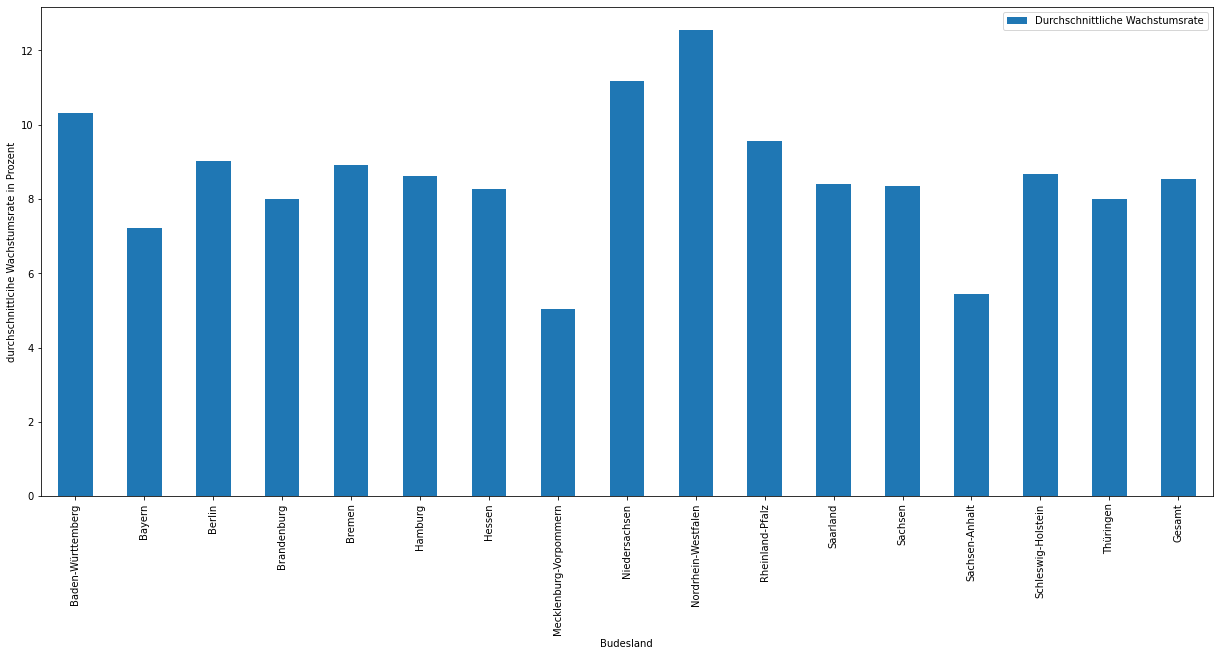

In [9]:
bars = durchwachstumfnl.plot.bar(x = 'Bundesland', y = 'AGR',label='Durchschnittliche Wachstumsrate',xlabel='Budesland',ylabel='durchschnittlcihe Wachstumsrate in Prozent');

2020-10-30 15:20:09 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x00000246E62C9F88>
2020-10-30 15:20:09 [fiona.env] DEBUG: Starting outermost env
2020-10-30 15:20:09 [fiona.env] DEBUG: No GDAL environment exists
2020-10-30 15:20:09 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x00000246E4C94FC8> created
2020-10-30 15:20:09 [fiona._env] DEBUG: Logging error handler pushed.
2020-10-30 15:20:09 [fiona._env] DEBUG: All drivers registered.
2020-10-30 15:20:09 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-10-30 15:20:09 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-10-30 15:20:09 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x00000246E4C94FC8>.
2020-10-30 15:20:09 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x00000246E4C94FC8> with options

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.912149999999999
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.80715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 5.063513636363637
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.33215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 4.063513636363637
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Georgia' (georgia.ttf) normal norma

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.61715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Latha' (462364.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DARLING' (ARDARLING.ttf) normal normal 5 normal>) = 10.0519
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Bold.ttf) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.61715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysTouch' (TINspireKeysTouch.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.90215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.61715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 7.265786363636363
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.61715
2020-1

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Lt.ttf) normal normal 300 normal>) = 10.33215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>)

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MicraC' (MICRAC.OTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.33215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [ma

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Regular.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Italic.ttf) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.42715
2020-10-30 15:20

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.61715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 8.275786363636362
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.61715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Console' (

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 4.348513636363637
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_LtIt.ttf) italic normal 300 normal>) = 11.33215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.71215
20

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Let's go Digital' (Let's go Digital Re

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 7.075786363636364
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.33215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.71215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.37965
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPIcons' (sapin.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.32265
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaRG.TTF) normal normal 400 normal>) = 10.42715
2020-10

2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.42715
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.90215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.37965
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.33215
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.32265
2020-10-30 15:20:10 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.712

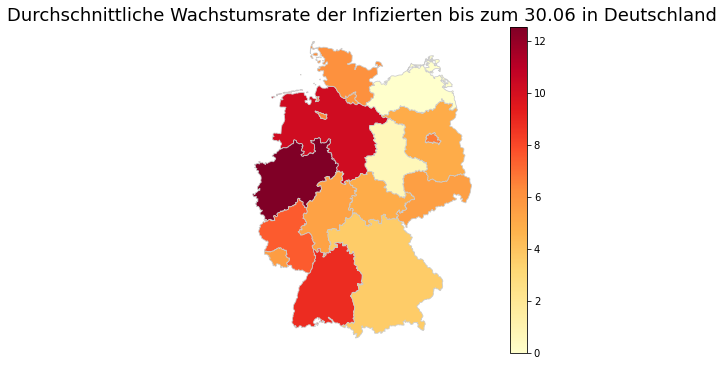

In [10]:
DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche Wachstumsrate der Infizierten bis zum 30.06 in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch NRW eine sehr hohe.

In [11]:
import statsmodels.formula.api as smf

lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

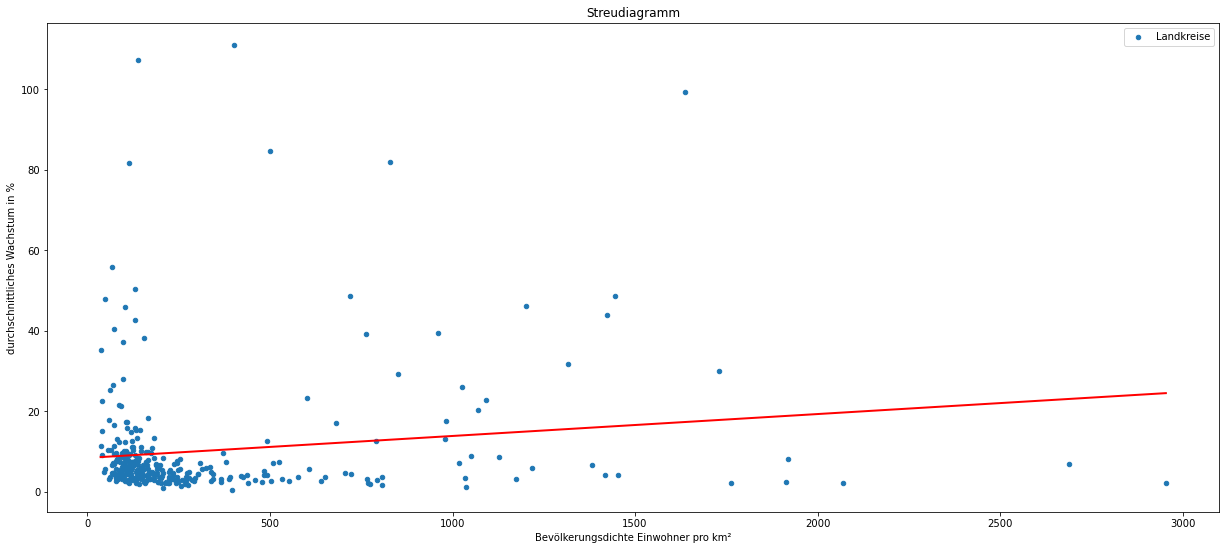

In [12]:
ax = plt.gca()
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")

#Trendlinie erstellen
#z = np.polyfit(compLK['Bev.D.Ew./km²'], compLK['AGR'], 1)
#p = np.poly1d(z)
#plt.plot(compLK['Bev.D.Ew./km²'],p(compLK['Bev.D.Ew./km²']),"r")

plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Streudiagramm')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [13]:
lm.params

Intercept    8.384567
Dichte       0.005444
dtype: float64

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen.

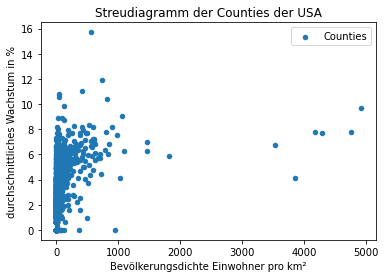

In [28]:
ax = plt.gca()

#Hiermit lösche ich die 2 am meisten Bevölkerten Counties, da man sie als Außreißer sehen kann
for j in range(2):    
    idx = DFCounty['Density'].idxmax()
    DFCounty = DFCounty.drop(idx)

DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax, label="Counties")
ax.set_title('Streudiagramm der Counties der USA')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [16]:
durchwachstumfnl.describe()

,AGR
count,17.000000
mean,8.591170
std,1.799148
min,5.034648
25%,8.006802
50%,8.540945
75%,9.025343
max,12.542029


In [17]:
compLK.describe()

,AGR,Bev.D.Ew./km²
count,322.000000,322.000000
mean,10.106238,316.279503
std,15.063383,409.852275
min,0.516924,36.000000
25%,3.515457,106.000000
50%,5.343918,160.000000
75%,9.073802,301.750000
max,110.979221,2954.000000


In [18]:
d['Hochsauerlandkreis'].describe()

,cases,cases_per_100k,deaths,deaths_per_100k,täglicher Wachstum,dailycases,Rate,kumcases,dailydeaths,kumdeaths
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,413.058824,158.579060,4.485294,1.721966,0.017012,14.264706,2.085031,710.411765,0.264706,4.558824
std,160.697257,61.693931,7.306698,2.805142,0.116643,32.436674,10.709041,232.711226,1.589308,7.438067
min,109.000000,41.846600,0.000000,0.000000,-0.617544,0.000000,-61.754386,252.000000,0.000000,0.000000
25%,252.750000,97.034225,0.000000,0.000000,0.001647,1.000000,0.167025,482.000000,0.000000,0.000000
50%,449.000000,172.377400,0.000000,0.000000,0.010620,5.500000,1.273942,783.000000,0.000000,0.000000
75%,560.500000,215.183775,13.250000,5.086875,0.034457,15.250000,4.486483,921.500000,0.000000,13.250000
max,609.000000,233.803600,18.000000,6.910500,0.316547,252.000000,24.460432,970.000000,13.000000,18.000000


In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(compLKfnl)
y_km = km.predict(compLKfnl)

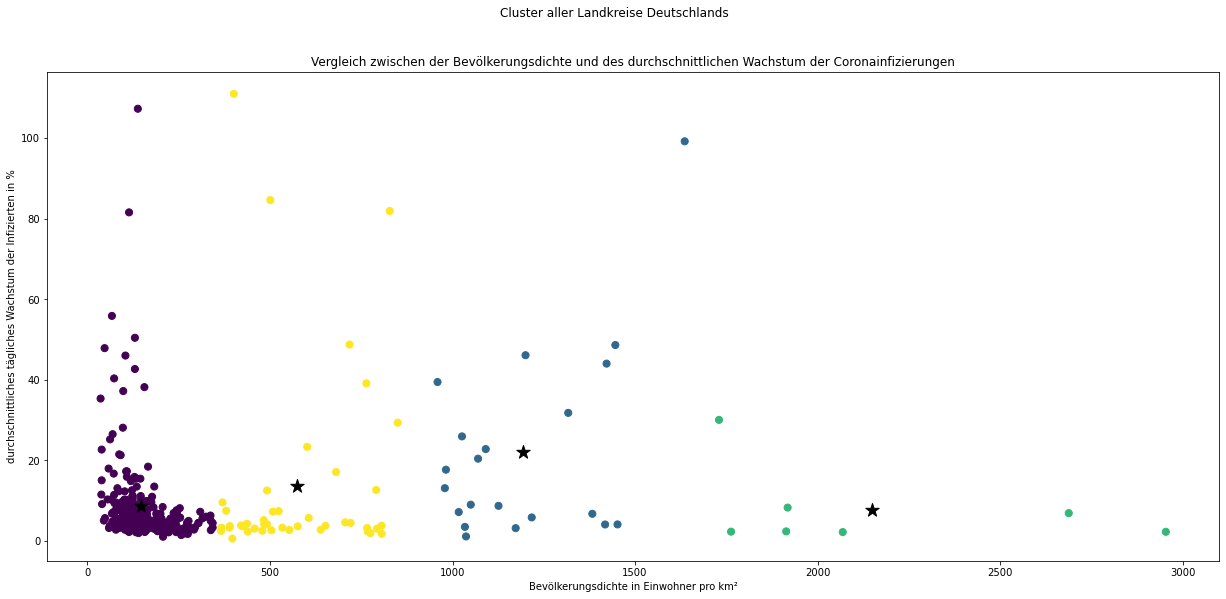

In [20]:
plt.scatter(compLKfnl["Dichte"], compLKfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster aller Landkreise Deutschlands")
plt.ylabel("durchschnittliches tägliches Wachstum der Infizierten in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

Cluster des zuvor erstellen Streudiagramms mit 4 Centers